In [1]:
from tools import datacleaner
import config
import os
import sys
import pandas as pd
import numpy as np
from fbprophet import Prophet
import fbprophet

# Reading files to compose stores dataframe for each variable (sales and clients)

In [2]:
df_274_time = datacleaner.get_Dataframes_time(274,'s')
df_274_time.reset_index(inplace=True)
df_274_time.head(10)

ds    y
0 2020-03-01 07:30:00    2
1 2020-03-01 08:00:00  144
2 2020-03-01 08:30:00  117
3 2020-03-01 09:00:00   65
4 2020-03-01 09:30:00  271
5 2020-03-01 10:00:00  624
6 2020-03-01 10:30:00  594
7 2020-03-01 11:00:00  325
8 2020-03-01 11:30:00  272
9 2020-03-01 12:00:00  505

In [37]:
df_274_sales = datacleaner.get_Dataframes(274,'s')
df_432_sales = datacleaner.get_Dataframes(432,'s')
df_274_cli = datacleaner.get_Dataframes(274,'c')
df_432_cli = datacleaner.get_Dataframes(432,'c')

In [38]:
# resetting index

df_274_sales.reset_index(inplace=True)
df_432_sales.reset_index(inplace=True)
df_274_cli.reset_index(inplace=True)
df_432_cli.reset_index(inplace=True)

# Initializing and fitting models
   #### Parameters:
   + growth: linear/logistic
   + seasonality: additive/multiplicative
   + holidays:
   + changepoints:

In [59]:
path = getattr(config,'path','default_value')
old_stdout = sys.stdout
sys.stdout = open(path+'/logs/sisqual_monthly_jupyter.log', 'w')
m_274_sale_test = Prophet(seasonality_mode='multiplicative')
m_274_sale = Prophet()
m_274_sale.fit(df_274_sales)
m_274_cli = Prophet()
m_274_cli.fit(df_274_cli)
m_432_sale = Prophet()
m_432_sale.fit(df_432_sales)
m_432_cli = Prophet()
m_432_cli.fit(df_432_cli)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Creating future dataframe of 30 days
    Future for 274 sales

In [48]:
future_274_sale = m_274_sale.make_future_dataframe(periods=365)
m_274_sale_test.fit(df_274_sales)
future_274_sales_test = m_274_sale_test.make_future_dataframe(50, freq='MS')
future_274_sale.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
452 2021-05-27
453 2021-05-28
454 2021-05-29
455 2021-05-30
456 2021-05-31

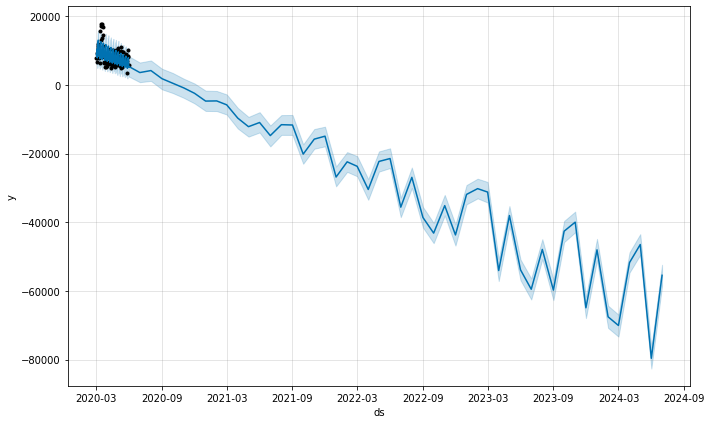

In [50]:
forecast_274_sales_test = m_274_sale_test.predict(future_274_sales_test)
fig_274_sales_test = m_274_sale_test.plot(forecast_274_sales_test)

    Future for 274 clients

In [51]:
future_274_cli = m_274_cli.make_future_dataframe(periods=365)
future_274_cli.tail()

ds
452 2021-05-27
453 2021-05-28
454 2021-05-29
455 2021-05-30
456 2021-05-31

    Future for 432 sales

In [52]:
future_432_sale = m_432_sale.make_future_dataframe(periods=365)
future_432_sale.tail()

ds
452 2021-05-27
453 2021-05-28
454 2021-05-29
455 2021-05-30
456 2021-05-31

    Future for 432 clients

In [53]:
future_432_cli = m_432_cli.make_future_dataframe(periods=365)
future_432_cli.tail()

ds
452 2021-05-27
453 2021-05-28
454 2021-05-29
455 2021-05-30
456 2021-05-31

## Predicting future for the above created dataframes
    Sales prediction for store 274

In [54]:
forecast_274_sales = m_274_sale.predict(future_274_sale)
forecast_274_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
452 2021-05-27 -12792.498251 -15728.187652  -9725.915702
453 2021-05-28 -13015.482401 -15898.767290 -10007.960643
454 2021-05-29 -13828.494545 -16766.980467 -10696.020069
455 2021-05-30  -9099.215585 -12017.402007  -6221.447791
456 2021-05-31  -9498.591531 -12325.852381  -6610.127541

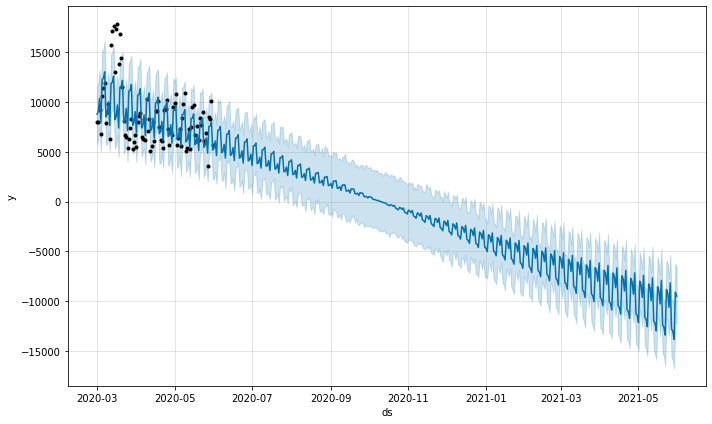

In [55]:
# Plotting the forecasted model and the components

fig_forecast_274_sale = m_274_sale.plot(forecast_274_sales)

/Users/clonyjr/Library/Mobile Documents/com~apple~CloudDocs/Aveiro/UA/CLONY/Bolsas/Forecast/prophet/lib/python3.8/site-packages/fbprophet/plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator



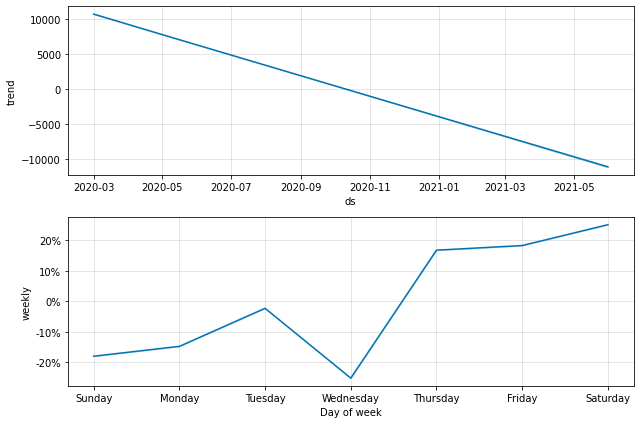

In [56]:
fig_comp_forecast_274_sale = m_274_sale.plot_components(forecast_274_sales)

In [57]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig_plotly_forecast_274_sale = plot_plotly(m_274_sale, forecast_274_sales)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_274_sale)

# Trend Changepoints

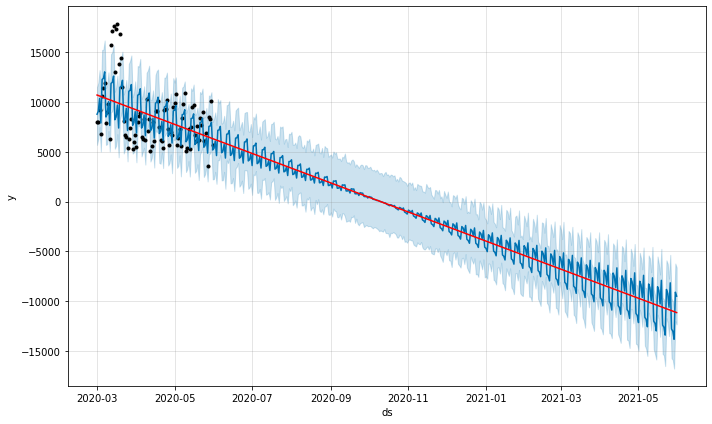

In [58]:
from fbprophet.plot import add_changepoints_to_plot
fig_274_sales_changepoint = m_274_sale.plot(forecast_274_sales)
a = add_changepoints_to_plot(fig_274_sales_changepoint.gca(), m_274_sale, forecast_274_sales)

    Clients prediction for store 274

In [15]:
forecast_274_cli = m_274_cli.predict(future_274_cli)
forecast_274_cli[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
117 2020-06-26  541.018417  396.579233  679.662494
118 2020-06-27  527.895919  380.125389  682.263687
119 2020-06-28  316.798353  170.709370  456.769735
120 2020-06-29  425.324762  282.604737  575.839940
121 2020-06-30  472.630146  328.485245  626.865611

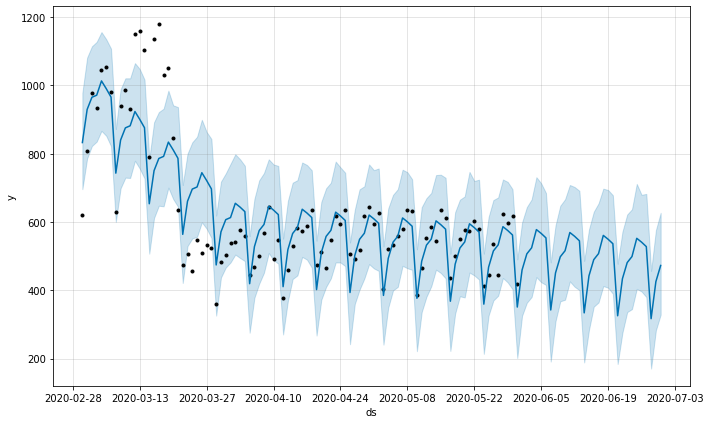

In [16]:
# Plotting the forecasted model and the components

fig_forecast_274_cli = m_274_cli.plot(forecast_274_cli)

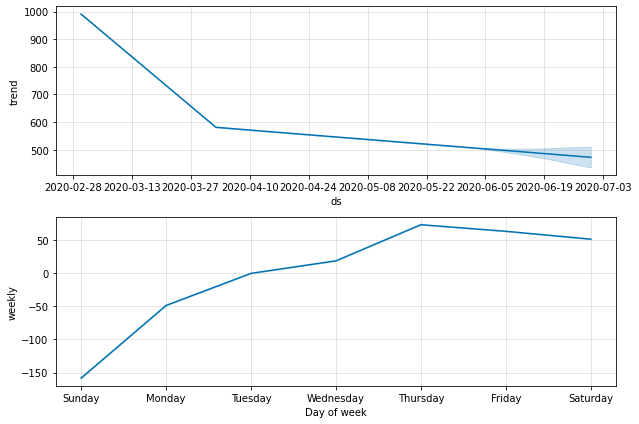

In [17]:
fig_comp_forecast_274_cli = m_274_cli.plot_components(forecast_274_cli)

In [18]:
fig_plotly_forecast_274_cli = plot_plotly(m_274_cli, forecast_274_cli)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_274_cli)

    Sales prediction for store 432

In [19]:
forecast_432_sales = m_432_sale.predict(future_432_sale)
forecast_432_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
117 2020-06-26  3724.428605  2660.201331  4805.126474
118 2020-06-27  4541.738225  3544.164057  5590.816418
119 2020-06-28  2752.509257  1670.881612  3775.366188
120 2020-06-29  2622.397747  1582.718294  3623.963307
121 2020-06-30  2934.232918  1891.368942  4034.020364

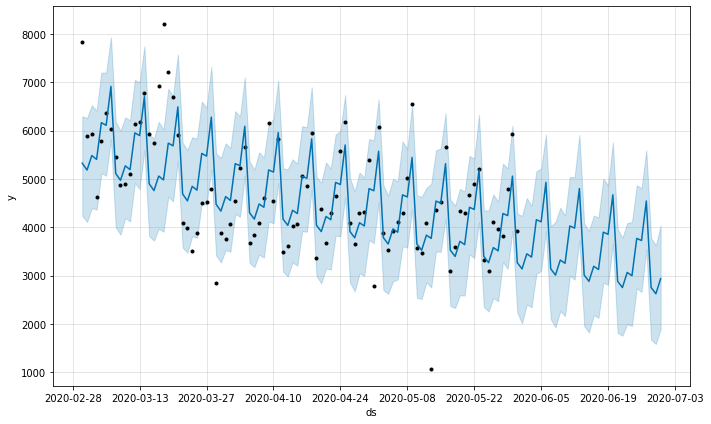

In [20]:
# Plotting the forecasted model and the components

fig_forecast_432_sale = m_432_sale.plot(forecast_432_sales)

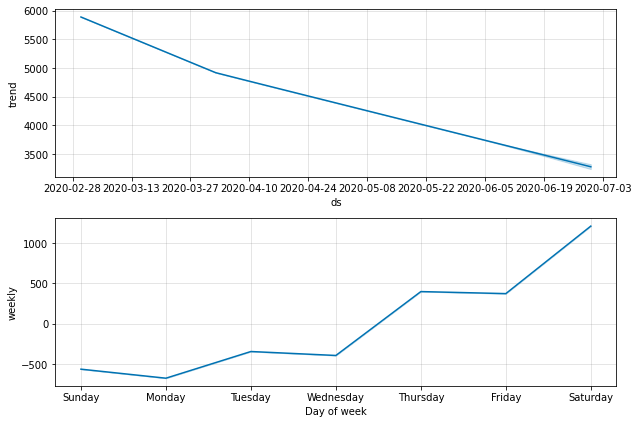

In [21]:
fig_comp_forecast_432_sale = m_432_sale.plot_components(forecast_432_sales)

In [22]:
fig_plotly_forecast_432_sale = plot_plotly(m_432_sale, forecast_432_sales)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_432_sale)

    Clients prediction for store 432

In [23]:
forecast_432_cli = m_432_cli.predict(future_432_cli)
forecast_432_cli[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
117 2020-06-26  491.638988  386.869805  591.773931
118 2020-06-27  542.443614  446.548472  644.445907
119 2020-06-28  365.446937  264.301814  459.738591
120 2020-06-29  394.861970  294.157998  491.366704
121 2020-06-30  425.520117  317.460962  528.631420

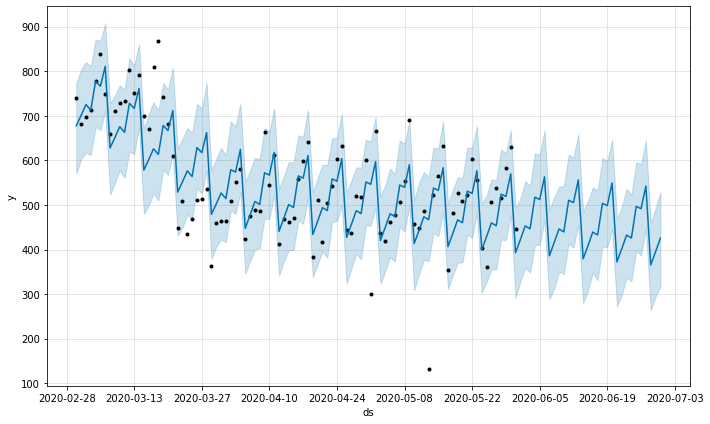

In [24]:
# Plotting the forecasted model and the components

fig_forecast_432_cli = m_432_cli.plot(forecast_432_cli)

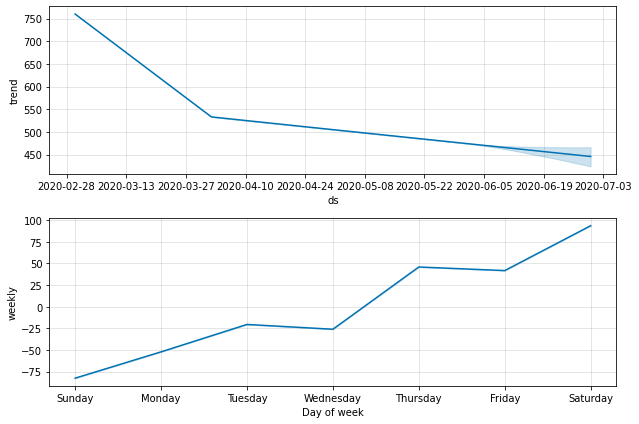

In [25]:
fig_comp_forecast_432_cli = m_432_cli.plot_components(forecast_432_cli)

In [26]:
fig_plotly_forecast_432_cli = plot_plotly(m_432_cli, forecast_432_cli)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_432_cli)

# Create Holydays
    TODO

# Analysing Seasonality
    Sales 274

In [ ]:
from fbprophet.plot import plot_weekly
m_274_sales_weekly = Prophet().fit(df_274_sales)
a = plot_weekly(m_274_sales_weekly)

In [ ]:
from fbprophet.plot import plot_weekly
m_274_sales_weekly = Prophet(weekly_seasonality=8).fit(df_274_sales)
a = plot_weekly(m_274_sales_weekly)

# Custom seasonality

In [ ]:
m_274_sales_weekly_custom_seasonality = Prophet(weekly_seasonality=False)
m_274_sales_weekly_custom_seasonality.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast_274_sales_weekly_custom_seasonality = m_274_sales_weekly_custom_seasonality.fit(df_274_sales).predict(forecast_274_sales)
fig = m_274_sales_weekly_custom_seasonality.plot_components(forecast_274_sales_weekly_custom_seasonality)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


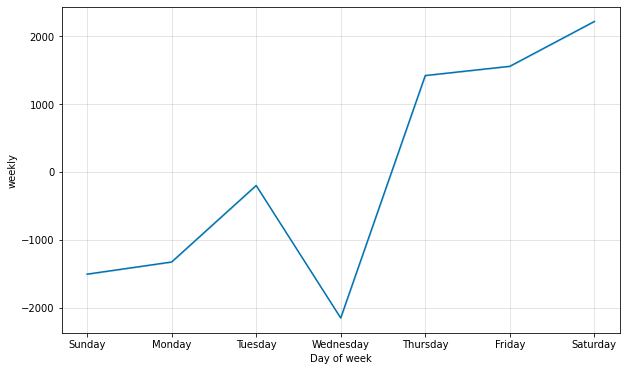

In [27]:
from fbprophet.plot import plot_weekly
m_274_sales_weekly = Prophet().fit(df_274_sales)
a = plot_weekly(m_274_sales_weekly)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


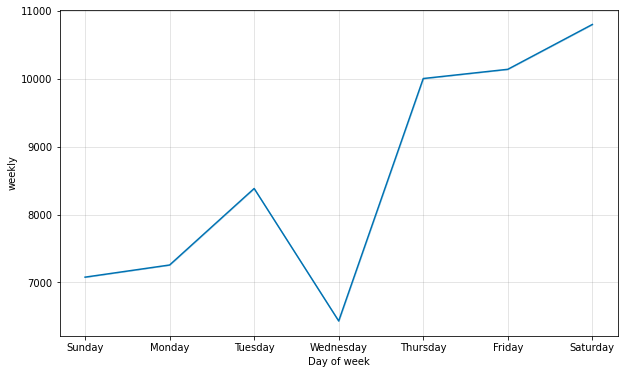

In [29]:
from fbprophet.plot import plot_weekly
m_274_sales_weekly = Prophet(weekly_seasonality=8).fit(df_274_sales)
a = plot_weekly(m_274_sales_weekly)

# Custom seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


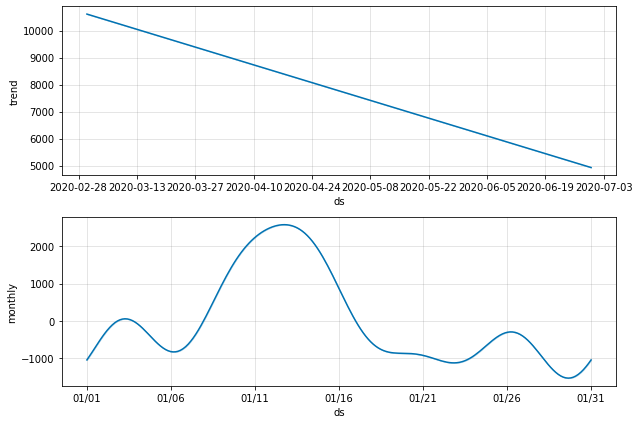

In [33]:
m_274_sales_weekly_custom_seasonality = Prophet(weekly_seasonality=False)
m_274_sales_weekly_custom_seasonality.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast_274_sales_weekly_custom_seasonality = m_274_sales_weekly_custom_seasonality.fit(df_274_sales).predict(forecast_274_sales)
fig = m_274_sales_weekly_custom_seasonality.plot_components(forecast_274_sales_weekly_custom_seasonality)